# Logitistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples = 1000, n_features = 10,n_classes = 2,random_state = 15)


In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
y[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [63]:
X.shape

(10000, 2)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [9]:
y_pred = lr.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.93

In [11]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       101
           1       0.95      0.91      0.93        99

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



# **Hyper parameter Tuning using Grid Search CV**

In [12]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

In [13]:
params = dict(penalty = penalty, C = c_values,solver = solver)

In [14]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [15]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = params, scoring = 'accuracy',cv = cv,n_jobs = -1)

In [16]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [17]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [18]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [19]:
grid.best_score_

0.9262499999999999

In [20]:
y_pred = grid.predict(X_test)

In [21]:
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))


0.94
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       107
           1       0.91      0.97      0.94        93

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



**Randomized Search CV**

In [22]:
model = LogisticRegression()


In [23]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(estimator = model,param_distributions = params, scoring = 'accuracy')

In [24]:
rs.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [25]:
rs.best_score_

0.9175000000000001

In [26]:
rs.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}

In [27]:
y_pred = rs.predict(X_test)

In [28]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.925
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       106
           1       0.90      0.95      0.92        94

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



# Multi class using Logistic Regression

In [29]:
X, y = make_classification(n_samples=1000, n_features=10,n_informative=3, n_classes=3, random_state=15)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class= 'ovr')
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [33]:
y_pred = lr.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.79
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        59
           1       0.72      0.82      0.77        61
           2       0.84      0.71      0.77        80

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200

[[51  2  6]
 [ 6 50  5]
 [ 6 17 57]]


Grid Search CV with multiclass

In [35]:
model = LogisticRegression(multi_class= 'ovr')
gsv = GridSearchCV(estimator =model,param_grid = params,scoring = 'accuracy')

In [36]:
gsv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

GridSearchCV(estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [37]:
gsv.best_score_

0.79375

In [38]:
gsv.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [39]:
y_pred = gsv.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.795
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        58
           1       0.74      0.80      0.77        64
           2       0.84      0.73      0.78        78

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.79       200

[[51  3  4]
 [ 6 51  7]
 [ 6 15 57]]


# Logistic Regression for Imbalanced Dataset

In [40]:
from collections import Counter
from sklearn.datasets import make_classification

## imbalanced dataset
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
                   n_redundant=0,weights=[0.99],random_state=10)

In [41]:
Counter(y)

Counter({0: 9846, 1: 154})

In [42]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [43]:
data_set = pd.DataFrame(X, columns=['feature_1', 'feature_2'])

In [44]:
data_set

,feature_1,feature_2
0,1.879910,-1.485035
1,0.377083,-2.238585
2,1.354312,-2.664638
3,-0.509843,-1.502950
4,0.863561,-1.906364
...,...,...
9995,1.066698,-0.548159
9996,1.058723,-0.933768
9997,0.995099,-0.541924
9998,1.758594,-1.549612


In [45]:
data_set['target'] = y

In [46]:
data_set

,feature_1,feature_2,target
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0
...,...,...,...
9995,1.066698,-0.548159,0
9996,1.058723,-0.933768,0
9997,0.995099,-0.541924,0
9998,1.758594,-1.549612,0


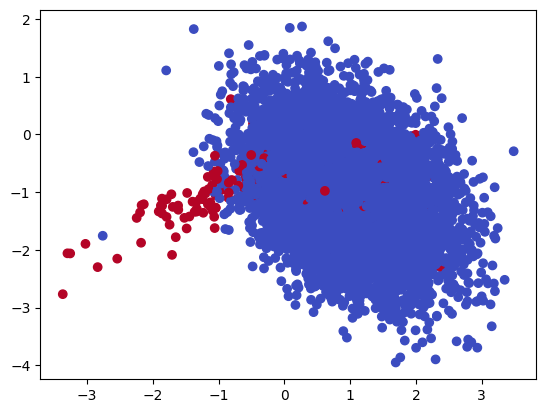

In [47]:
plt.scatter(data_set['feature_1'],data_set['feature_2'], c =data_set['target'], cmap = 'coolwarm')

In [48]:
X_data = data_set.drop('target', axis = 1)

In [49]:
X_data

,feature_1,feature_2
0,1.879910,-1.485035
1,0.377083,-2.238585
2,1.354312,-2.664638
3,-0.509843,-1.502950
4,0.863561,-1.906364
...,...,...
9995,1.066698,-0.548159
9996,1.058723,-0.933768
9997,0.995099,-0.541924
9998,1.758594,-1.549612


In [50]:
X_train,X_test,y_train,y_test = train_test_split(X_data, data_set['target'], test_size = 0.2)

In [51]:
class_weight= []
w = [1,10,50,100]
y = [1,10,50,100]
for w1 in w:
  one = {}
  one[0] = w1
  for y1 in y:
    one[1] = y1
    class_weight.append(one)

In [52]:
class_weight

[{0: 1, 1: 100},
 {0: 1, 1: 100},
 {0: 1, 1: 100},
 {0: 1, 1: 100},
 {0: 10, 1: 100},
 {0: 10, 1: 100},
 {0: 10, 1: 100},
 {0: 10, 1: 100},
 {0: 50, 1: 100},
 {0: 50, 1: 100},
 {0: 50, 1: 100},
 {0: 50, 1: 100},
 {0: 100, 1: 100},
 {0: 100, 1: 100},
 {0: 100, 1: 100},
 {0: 100, 1: 100}]

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [54]:
penalty = ['l1','l2','elasticnet']
c_values = [0,0.1,0.01,10,100,1]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']


In [55]:
params = dict(penalty = penalty, C=c_values, solver = solver,class_weight = class_weight)

In [56]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [0, 0.1, 0.01, 10, 100, 1],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 100},
  {0: 1, 1: 100},
  {0: 1, 1: 100},
  {0: 1, 1: 100},
  {0: 10, 1: 100},
  {0: 10, 1: 100},
  {0: 10, 1: 100},
  {0: 10, 1: 100},
  {0: 50, 1: 100},
  {0: 50, 1: 100},
  {0: 50, 1: 100},
  {0: 50, 1: 100},
  {0: 100, 1: 100},
  {0: 100, 1: 100},
  {0: 100, 1: 100},
  {0: 100, 1: 100}]}

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [58]:
grid = GridSearchCV(model, param_grid = params,scoring = 'accuracy',cv = cv)

In [59]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0, 0.1, 0.01, 10, 100, 1],
                         'class_weight': [{0: 1, 1: 100}, {0: 1, 1: 100},
                                          {0: 1, 1: 100}, {0: 1, 1: 100},
                                          {0: 10, 1: 100}, {0: 10, 1: 100},
                                          {0: 10, 1: 100}, {0: 10, 1: 100},
                                          {0: 50, 1: 100}, {0: 50, 1: 100},
                                          {0: 50, 1: 100}, {0: 50, 1: 100},
                                          {0: 100, 1: 100}, {0: 100, 1: 100},
                                          {0: 100, 1: 100}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [60]:
grid.best_score_

0.9880000000000001

In [61]:
grid.best_params_

{'C': 0.1,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [62]:
y_pred = grid.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9885
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1991
           1       0.27      0.89      0.41         9

    accuracy                           0.99      2000
   macro avg       0.63      0.94      0.70      2000
weighted avg       1.00      0.99      0.99      2000

[[1969   22]
 [   1    8]]


**ROC CURVE of logistic Regression**

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [66]:
X,y = make_classification(n_samples = 1000, n_classes = 2, random_state = 1)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [69]:
dummy_model_prob = [0 for _ in range(len(y_test))]

In [70]:
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [71]:
model_probs = lr.predict_proba(X_test)

In [75]:
model_probs = model_probs[:,1] # focus on positive outcome

In [76]:
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
lr_auc = roc_auc_score(y_test,model_probs)
print(dummy_model_auc)
print(lr_auc)

0.5
0.8995383380168608


In [77]:
# calculate the Roc Values
dummy_fpr,dummy_tpr,_ = roc_curve(y_test,dummy_model_prob)
lr_fpr,lr_tpr,threshold = roc_curve(y_test,model_probs)



In [79]:
threshold

array([           inf, 9.99746470e-01, 9.57758694e-01, 9.56874850e-01,
       9.44692000e-01, 9.40798698e-01, 9.27422045e-01, 9.25366478e-01,
       9.24251909e-01, 9.23295200e-01, 8.99543928e-01, 8.97529800e-01,
       8.48175830e-01, 8.43011275e-01, 8.23266961e-01, 8.22695247e-01,
       8.16564248e-01, 8.09487362e-01, 8.04548646e-01, 7.94948723e-01,
       7.81078622e-01, 7.60448777e-01, 7.60342634e-01, 7.51848883e-01,
       7.40369385e-01, 7.33284233e-01, 7.29232595e-01, 7.27168990e-01,
       6.55452536e-01, 6.52640043e-01, 6.46430871e-01, 6.30467947e-01,
       6.20343499e-01, 6.18363410e-01, 6.01171149e-01, 5.99570512e-01,
       5.57425863e-01, 5.47504289e-01, 5.39096397e-01, 5.01053464e-01,
       4.97145320e-01, 4.94836261e-01, 4.90732140e-01, 4.84229485e-01,
       4.72109796e-01, 4.60005139e-01, 4.58293698e-01, 4.49274042e-01,
       4.08140395e-01, 3.18539320e-01, 3.05995455e-01, 2.96107469e-01,
       2.84186360e-01, 2.12193211e-01, 2.02795674e-01, 1.77126313e-01,
      

In [81]:
lr_fpr,lr_tpr

(array([0.        , 0.        , 0.        , 0.00943396, 0.00943396,
        0.01886792, 0.01886792, 0.02830189, 0.02830189, 0.03773585,
        0.03773585, 0.04716981, 0.04716981, 0.05660377, 0.05660377,
        0.06603774, 0.06603774, 0.0754717 , 0.0754717 , 0.08490566,
        0.08490566, 0.09433962, 0.09433962, 0.10377358, 0.10377358,
        0.12264151, 0.12264151, 0.13207547, 0.13207547, 0.14150943,
        0.14150943, 0.16981132, 0.16981132, 0.17924528, 0.17924528,
        0.18867925, 0.18867925, 0.19811321, 0.19811321, 0.21698113,
        0.21698113, 0.22641509, 0.22641509, 0.23584906, 0.23584906,
        0.24528302, 0.24528302, 0.25471698, 0.25471698, 0.32075472,
        0.32075472, 0.33018868, 0.33018868, 0.39622642, 0.39622642,
        0.4245283 , 0.4245283 , 0.54716981, 0.54716981, 0.55660377,
        0.55660377, 0.60377358, 0.60377358, 1.        ]),
 array([0.        , 0.0106383 , 0.22340426, 0.22340426, 0.27659574,
        0.27659574, 0.35106383, 0.35106383, 0.36170213, 0.

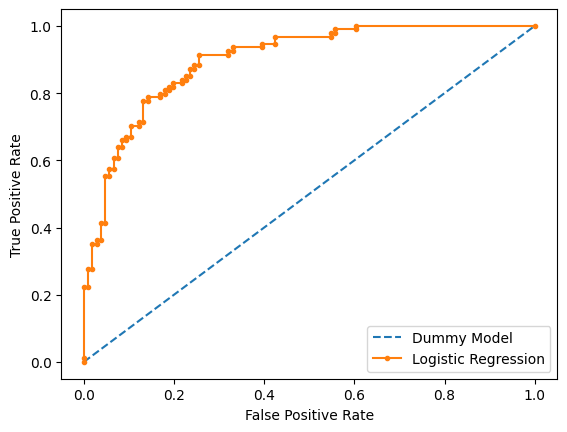

In [82]:
import seaborn as sns
plt.plot(dummy_fpr,dummy_tpr,linestyle = '--',label = 'Dummy Model')
plt.plot(lr_fpr,lr_tpr, marker = '.',label = 'Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

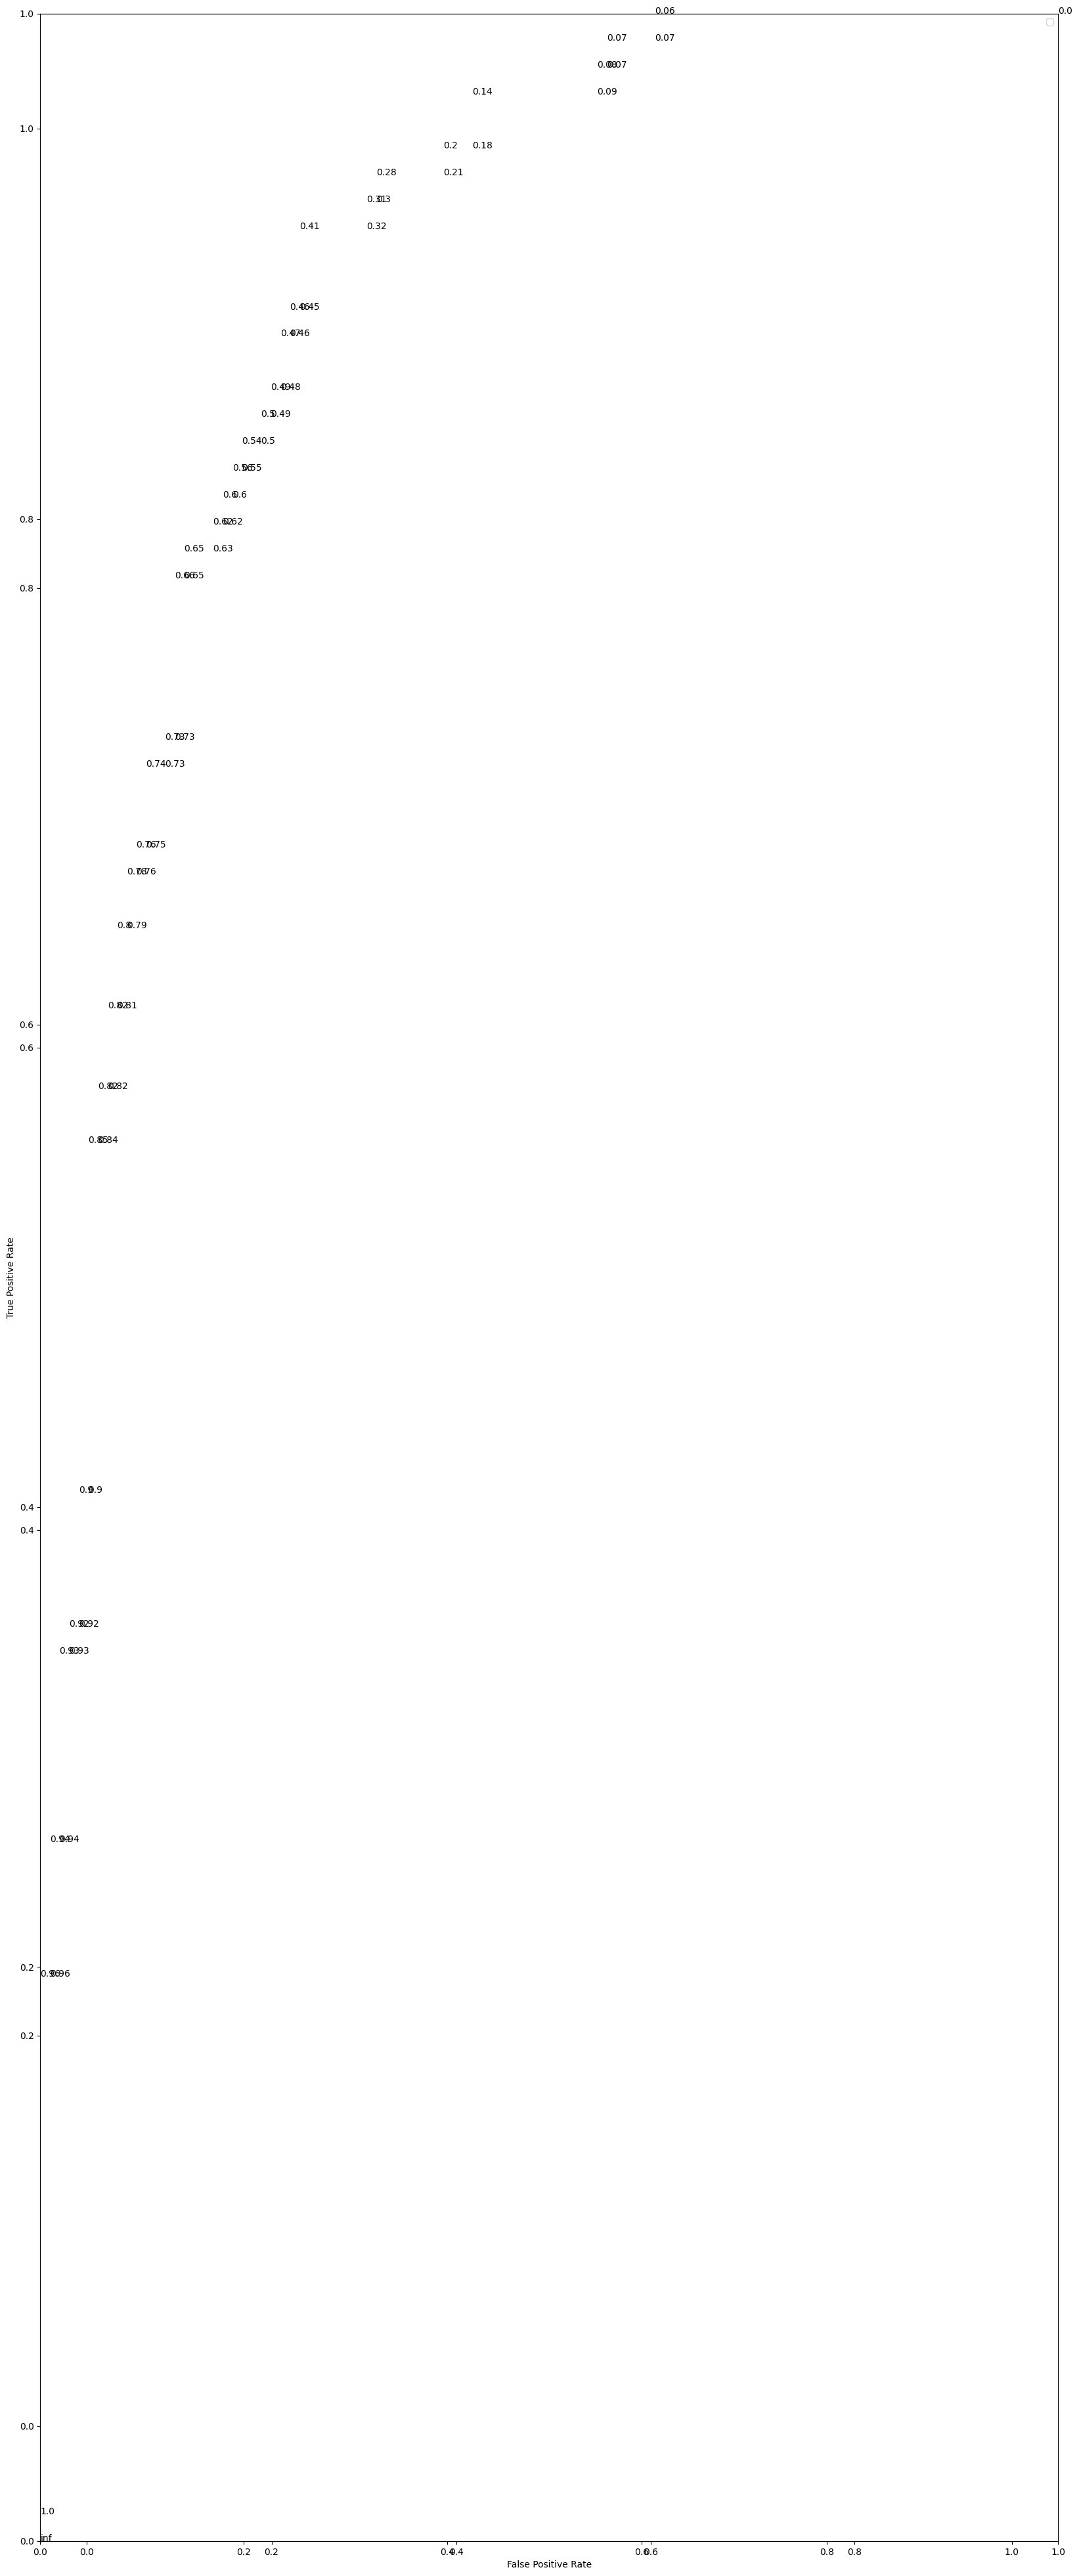

In [85]:
import numpy as np
fig = plt.figure(figsize = (20,50))
plt.plot(dummy_fpr,dummy_tpr,linestyle = '--', label = "Dummy Model")
plt.plot(lr_fpr, lr_tpr, marker = '.', label = 'Logistic')
ax = fig.add_subplot(111)
for xyz in zip(lr_fpr, lr_tpr,threshold):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [87]:
J = lr_tpr - lr_fpr
optimal_idx = np.argmax(J)
optimal_threshold = threshold[optimal_idx]

In [88]:
optimal_threshold

0.4081403954960412

In [89]:
y_optimal = (model_probs>optimal_threshold).astype(int)

In [90]:
y_optimal

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0])

In [95]:
y_pred = lr.predict(X_test)

In [91]:
accuracy_score(y_optimal,y_test)

0.82

In [96]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.83      0.77      0.80       101

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [97]:
print(classification_report(y_optimal,y_test))

              precision    recall  f1-score   support

           0       0.75      0.90      0.81        88
           1       0.90      0.76      0.83       112

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200

